Recently, the annual number of driver deaths per 100,000 for the selected age groups was as follows:

Age	Number of Driver Deaths per 100,000
17.5	38
22	36
29.5	24
44.5	20
64.5	18
80	28
Questions
For each age group, pick the midpoint of the interval for the x value. (For the 75+ group, use 80.)
Using “ages” as the independent variable and “Number of driver deaths per 100,000” as the dependent variable, make a scatter plot of the data.
Calculate the least squares (best–fit) line. Put the equation in the form of: ŷ = a + bx
Predict the number of deaths for ages 40 and 60.
Based on the given data, is there a linear relationship between age of a driver and driver fatality rate?
Find the correlation coefficient (Pearson's r). Is it significant?

In [75]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [76]:
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [105]:
import numpy as np

X = np.array([[17.5],[22], [29.5], [44.5], [64.5],[80]])
y = np.array([[38], [36], [24], [20], [18], [28]])
age_groups_midpoint = {'<19': 16,
             '20-24': 0,
             '25-29': 0,
             '30-34': 0,
             '35-39': 0,
             '40-44': 0,
             '45-49': 0,
             '50-54': 0,
             '55-59': 0,
             '60-64': 0,
             '65-69': 0,
             '70-74':0,
             '75>': 80}

In [106]:
def find_age_group_midpoint(age_groups):
    for age_group in age_groups.keys():
        if '<' not in age_group and '>' not in age_group:
            temp_split = age_group.split('-')
            mid_point = (int(temp_split[0]) + int(temp_split[1]))/2
            age_groups[age_group] = mid_point
    return

find_age_group_midpoint(age_groups_midpoint)
age_groups_midpoint

{'<19': 16,
 '20-24': 22.0,
 '25-29': 27.0,
 '30-34': 32.0,
 '35-39': 37.0,
 '40-44': 42.0,
 '45-49': 47.0,
 '50-54': 52.0,
 '55-59': 57.0,
 '60-64': 62.0,
 '65-69': 67.0,
 '70-74': 72.0,
 '75>': 80}

Saving figure generated_data_plot


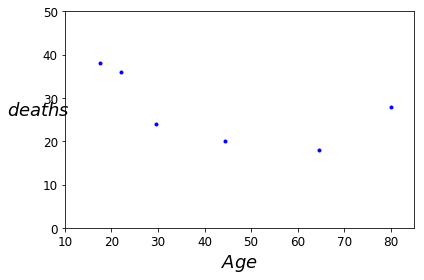

In [83]:
plt.plot(X, y, "b.")
plt.xlabel("$Age$", fontsize=18)
plt.ylabel("$deaths$", rotation=0, fontsize=18)
plt.axis([10, 85, 0, 50])
save_fig("generated_data_plot")
plt.show()

In [84]:
X_b = np.c_[np.ones((6, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [85]:
theta_best

array([[35.58180453],
       [-0.19182491]])

In [113]:
X_new = np.array([[0], [100]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[35.58180453],
       [16.39931338]])

In [114]:
print(y_predict)
print(X_new)

[[35.58180453]
 [16.39931338]]
[[  0]
 [100]]


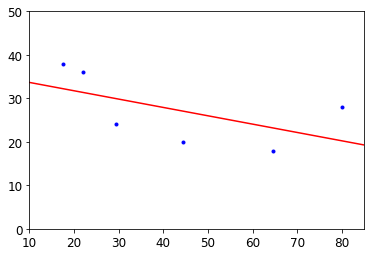

In [115]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([10, 85, 0, 50])
plt.show()

Saving figure linear_model_predictions


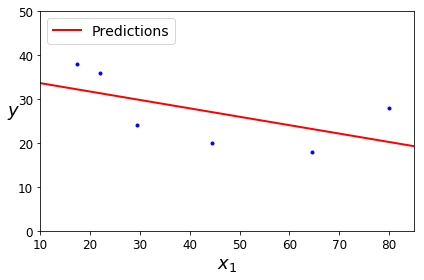

In [89]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([10, 85, 0, 50])
save_fig("linear_model_predictions")
plt.show()

In [117]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([35.58180453]), array([[-0.19182491]]))

In [109]:
print('Y = {:.2f} + {:.2f}X'.format(lin_reg.intercept_[0], lin_reg.coef_[0][0]))

Y = 35.58 + -0.19X


In [116]:
age_precition = np.array([[40], [60]])
lin_reg.predict(age_precition)

array([[27.90880807],
       [24.07230984]])

In [124]:
pearsonr(X,y)[0][0]

-0.578743707566063